# 🚀 Week 02: Training Machine Learning Models 🎯  

This week, we dive deeper into **Machine Learning** by learning how to **train models** for different types of problems, including **classification** and **prediction** tasks. 🧠💡  

### What You’ll Learn:  
🔹 How to **train models** using real-world data.  
🔹 The role of **features** in improving predictions.  
🔹 How to **evaluate model performance** and fine-tune it.  
🔹 The impact of **hyperparameters** like learning rate and epochs.  

By the end of this week, you'll be able to build, train, and test models confidently. Get ready to experiment, analyze, and improve your models! 🚀🔥

## Exercise 01 : **Predicting Trip Fare using Linear Regression**  
---

### **Objective**  
The goal of this task is to build a machine learning model that predicts the fare price of a trip based on selected features. You will go through the full machine learning workflow, including data preprocessing, model training, evaluation, and visualization.  

### **Tasks Overview**  

Follow these steps to train and evaluate a machine learning model:  

1. **Load and Explore the Data** 📝  
2. **Prepare the Data** 🔧  
3. **Train the Model** 🎯  
4. **Make Predictions** 🔮  
5. **Evaluate the Model** 📊  

### **Resources**  
[A Visual Introduction To (Almost) Everything You Should Know](https://mlu-explain.github.io/linear-regression/)

---

###1.Load and Explore the Data 📝

Load the dataset using pandas and inspect its structure.
Check for missing values and basic statistics.
Visualize key features to understand their relationship with the target variable.

In [20]:
data_url = "https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv"
# add your code here
import pandas as pd
import numpy as np

df = pd.read_csv("Admission_Prediction_Challenge.csv")


###2.Prepare the Data 🔧  
   - Select the most relevant features for training.  
   - Handle missing values if needed.  
   - Normalize or scale the data to improve performance if needed
   - Split the dataset into **training (80%)** and **testing (20%)** sets.  

>🙋 **Why we need to split our dataset**❓

In [31]:
# add your code here

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# sns.heatmap(df.corr(), annot=True)

# you forget to scale the data 
x = df.drop(columns=['Chance of Admit ', 'Serial No.'])
y = df['Chance of Admit ']
# print(x)
# x_scaled = scaler.fit_transform(x)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x) # <-- FIT step!
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.2, random_state=42) #learn more about Underfitting and Overfitting
# 0.2 represent the percentage of the dataset to test split 
#random_state -->  reproduire exactement la même séparation à chaque exécution du code (on peux utilise un autre nombre diffe a 42 ...)


# Why we need to split our dataset❓ ==> https://www.youtube.com/watch?v=dSCFk168vmo

### 3. Train the Model 🎯  

Train a **linear regression model** using `sklearn` (you can also try other alternatives).  

🔧 **Experiment with Different Features**  
- Start with a few features and observe the model's performance.  
- Try adding or removing features to see how it affects accuracy.  

> 🙋 **What are hyperparameters, and how do learning rate and epochs affect training** ❓

> 🙋 **Does using more features always improve the model** ❓

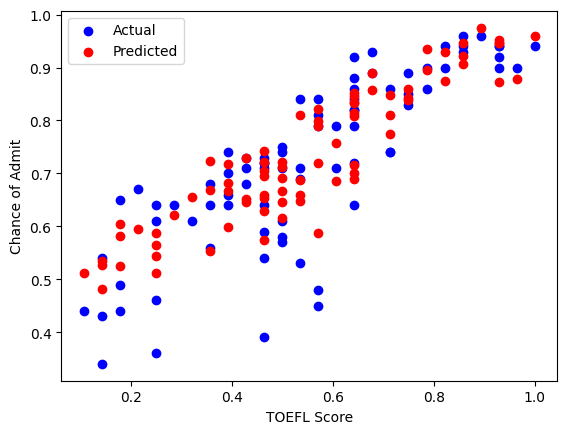

Fonction coût (MSE) : 0.00
Accuracy: 0.95


In [32]:

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
# Lire les données : il récupère les valeurs dans X (les heures) et y (les scores).
# Calculer la droite idéale : il cherche les meilleurs paramètres a et b qui minimisent l’erreur entre : ce que le modèle préditet ce que les données réelles disent.
# Formule utilisée : il utilise la méthode des moindres carrés pour ça.
# voila un vedio qui explique comment faire le calcule de a et b "https://www.youtube.com/watch?v=HaDrhuQPOQ4&t=479s"
# donc voila a et b 
# print(f"Pente (a) : {model.coef_[0]}")
# print(f"Ordonnée à l’origine (b) : {model.intercept_}")

y_pred = model.predict(x_test) # y_prédit = a * X + b

plt.scatter(x_test['TOEFL Score'], y_test, color='blue', label="Actual")# y_test hwa li deja 3ndna f database
plt.scatter(x_test['TOEFL Score'], y_pred, color='red', label="Predicted")# y_pred hwa result dyal model dyalna 
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.legend()
plt.show()
cost = mean_squared_error(y_test, y_pred)
print(f"Fonction coût (MSE) : {cost:.2f}")
from sklearn.metrics import accuracy_score

# transformer y_test et y_pred en binaire 
y_test_binary = (y_test >= 0.75).astype(int)
y_pred_binary = (y_pred >= 0.75).astype(int)
#commpare les (0 et 1) entre test et predect et indique la proba
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

#### 🎉 Congratulations! 🎉

**🚀You’ve just trained your first Machine Learning model! 🚀**

### 4. Make Predictions 🔮  

Use the trained model to predict values on the **testing data**.  
Compare the predictions with the actual values to assess accuracy.  
You can also try making predictions on the **training data** to see how well the model memorized the patterns.  

>🙋 **Why doesn’t the model predict exact values, even when using the training data**❓

In [33]:
# add your code here
# example_student_data = np.array([[10, 323, 108, 3, 3.5, 3, 8.6, 0]])

example_features = np.array([[323, 108, 3, 3.5, 3, 8.6, 0]])
example_features_scaled = scaler.transform(example_features)

prediction = model.predict(example_features_scaled)
print(f"Features (Scaled): {example_features_scaled.round(4)[0]}")
print(f"Prédiction for Student [GRE=323, ...]: {prediction[0]:.2f}")
print(f"Actual Chance of Admit for this student (from row 10 of original data): 0.45")
# Overfitting Le modèle s'adapte trop bien aux données d'entraînement, mais ne généralise pas bien sur les données de test.

# Underfitting Le modèle ne s'adapte pas bien aux données d'entraînement.

Features (Scaled): [0.66   0.5714 0.5    0.625  0.5    0.5769 0.    ]
Prédiction for Student [GRE=323, ...]: 0.72
Actual Chance of Admit for this student (from row 10 of original data): 0.45


/Users/maamichaima/Desktop/Entry-Level-ML-Engineer-Bootcamp/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/maamichaima/Desktop/Entry-Level-ML-Engineer-Bootcamp/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###5.Evaluate the Model 📊

Measure performance using metrics like MSE, RMSE, and R² Score.
Plot a loss curve to track training progress.
Create a scatter plot to compare actual vs. predicted values.

>🙋 **What do MSE, RMSE, and R² Score tell us about the model's performance**❓

>🙋 **How can you tell if your model is overfitting or underfitting**❓


In [36]:
# add your code here

# calcul mse
mse = mean_squared_error(y_test, y_pred) 

# calcul rmse
rmse = np.sqrt(mse)

# calcul de R² Score (test)
r2_test = r2_score(y_test, y_pred)

# calcul de R² Score (train)
y_train_pred = model.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score r2_test:  {r2_test:.4f}")
print(f"R² Score r2_train:  {r2_train:.4f}")



Mean Squared Error (MSE): 0.0046
Root Mean Squared Error (RMSE): 0.0679
R² Score r2_test:  0.8212
R² Score r2_train:  0.7952


---
## Exercise 02 : **University Admission Prediction Challenge**

😇 I know that the exercise is difficult, but you will practice what you learned last week along with your first classification algorithm.

### 🎯 Objective

Your mission is to predict whether a student will be admitted to their desired university based on various academic and application-related factors. You’ll use **Logistic Regression** to build a predictive model and discuss its strengths and limitations.

📊 The Dataset  :

[Admission_Predict.csv](https://github.com/1337-Artificial-Intelligence/Entry-Level-ML-Engineer-Bootcamp/blob/main/Week02/Admission_Prediction_Challenge.csv)

The dataset contains information on **400 students** with the following attributes:

- **GRE Score** 🎓
- **TOEFL Score** 📚
- **University Rating** 🏛️
- **Statement of Purpose (SOP) Score** ✍️
- **Letter of Recommendation (LOR) Score** 📩
- **Cumulative Grade Point Average (CGPA)** 🎯
- **Research Experience (Yes/No)** 🔬
- **Chance of Admission (Target Variable: 0 or 1)**

### 🛠️ Steps to Follow

1. **Load & Explore the Data**: Understand the dataset, check for missing values, and analyze distributions.
2. **Feature Selection & Processing**: Identify relevant features and scale them if needed.
3. **Train a Logistic Regression Model**: Implement Logistic Regression (**from scratch** optional) to classify students into "Admitted" or "Not Admitted."
4. **Evaluate the Model**: Measure accuracy, precision, recall, and other key metrics.(do some reaserch 🙂)
5. **Discuss Limitations**: Explore cases where Logistic Regression may struggle and suggest improvements (e.g., feature engineering, alternative models).

### **Resources**  
[Logistic Regression](https://mlu-explain.github.io/logistic-regression/)

### 🎨 Bonus: Visual Exploration

Use **histograms, correlation heatmaps, and scatter plots** to gain insights before modeling.

🔎 **Can you build a model that accurately predicts student admissions?** Let's find out! 🚀

In [6]:
# add your code here

---
##🎉 **Congratulations!** 🎉  

You've successfully trained your first **Linear Regression** and **Logistic Regression** models! 🚀  

Through this journey, you've learned:  
✅ How to **prepare and preprocess data** for training.  
✅ The importance of **choosing the right features** and tuning **hyperparameters**.  
✅ How to **train, predict, and evaluate models** using key metrics.  
✅ The difference between **regression (predicting continuous values)** and **classification (predicting categories)**.  

This is a **big step** in your Machine Learning journey! 💡 But ML is much more than just linear and logistic regression—there are many other models and techniques to explore.  

🔎 **Next Challenge:**  
- Research other **types of ML models** (e.g., Decision Trees, SVMs, Neural Networks).  
- Try solving different **real-world problems** using what you've learned.  

👏 Keep experimenting, keep learning, and welcome to the world of Machine Learning! 🚀🔥